In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from gensim.models import KeyedVectors
import pandas as pd
import numpy as np
import open_scoring as ocs

Load a pre-trained GloVe model.

* Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation.

In [ ]:
scorer = ocs.scoring.AUT_Scorer()
scorer.load_model('EN_100_lsa', '/data/tasa/EN_100k.word2vec.bin')
scorer.load_model('TASA_lsa', '/data/tasa/TASA.word2vec.bin')
scorer.load_model('EN_100_lsa', '/data/tasa/EN_100k.word2vec.bin'),
scorer.load_model('word2vec', '/data/word2vec/GoogleNews-vectors-negative300.bin.gz')
scorer.load_model('glove_840B', '/data/glove/glove.840B-300d.word2vec.bin')

In [7]:
data = ocs.file.WideData('Measurement study/Response level Data/Boulder Scores/AUT_Coding_ColoradoScores_v2.xlsx')
# Adjust internal representation to support this response-level dataset
data.df = data._original.rename(columns={'colorado similarity scores': 'cu_lsa'})[['prompt', "response", "cu_lsa"]]
data.df['response'] = data.df.response.astype(str).apply(data._clean_response)

In [ ]:
params = [
    dict(name='glove', model='glove_840B', idf=False, stop=False),
    dict(name='glove_idf', model='glove_840B', idf=True, stop=True),
    dict(name='word2vec', model='word2vec', idf=False, stop=False),
    dict(name='word2vec_idf', model='word2vec', idf=True, stop=True),
    dict(name='tasa_lsa', model='TASA_lsa', idf=False, stop=False),
    dict(name='tasa_lsa_idf', model='TASA_lsa', idf=True, stop=True),
    dict(name='en100_lsa', model='EN_100_lsa', idf=False, stop=False),
    dict(name='en100_lsa_idf', model='EN_100_lsa', idf=True, stop=True)
]
for param in params:
    print("Crunching:", param['name'])
    data.score(scorer, **param)

In [ ]:
data.df.sample(2)

In [ ]:
print("Ignoring these columns:", by_participant.columns[:5].tolist())
for col in by_participant.columns[5:].tolist():
    b = pd.pivot_table(by_participant, values=col, index='participant', columns='prompt', aggfunc=np.mean)
    b.to_csv('Measurement study/Participant level data/by-system-pivot/scores-%s.csv' % col)

# Crunch Actor Study

In [27]:
data = file.WideData('AlternateUses_ActorStudy.xls')
data._original.sample(1)

,participant,group,book,rope,fork,table,pants,bottle,brick,tire,shovel,shoe
162,163.0,3.0,Weapon\nDoorstop\nTofu-presser\nStool\nHair fl...,Jumping with friends\nTying up your partner\nF...,Combing your hair\nStabbing your brother\nRaki...,Becoming taller\nAvoiding rodents\nOpen-air fo...,Scarecrow garb\nExtra sleeves for cold arms\nS...,Portable Urinal\nInstrument (blowing air acros...,Paperweight\nDoorstop\nWeapon\nStepstool\nBook...,Swing\nRoll it down a hill and see whose stays...,Weapon\nPogo sticking without the bounce\nCrea...,Weapon\nPlanter for a small shrub\nDrinking be...


In [44]:
params = [
    dict(name='glove', model='glove_840B', idf=False, stop=False),
    dict(name='glove_idf', model='glove_840B', idf=True, stop=True),
    dict(name='word2vec', model='word2vec', idf=False, stop=False),
    dict(name='word2vec_idf', model='word2vec', idf=True, stop=True),
    dict(name='tasa_lsa', model='TASA_lsa', idf=False, stop=False),
    dict(name='tasa_lsa_idf', model='TASA_lsa', idf=True, stop=True),
    dict(name='en100_lsa', model='EN_100_lsa', idf=False, stop=False),
    dict(name='en100_lsa_idf', model='EN_100_lsa', idf=True, stop=True)
]
for param in params:
    print("Crunching:", param['name'])
    data.score(scorer, **param)

Crunching: glove
Column glove already exists. Re-crunching and re-writing.
Crunching: glove_idf
Crunching: word2vec
Crunching: word2vec_idf
Crunching: tasa_lsa
Crunching: tasa_lsa_idf
Crunching: en100_lsa
Crunching: en100_lsa_idf


In [216]:
data.to_wide().to_csv('data/AUT_actor_all.csv')
data.to_wide(aggfunc='max').to_csv('data/AUT_actor_all_responsemax.csv')
data.fluency(wide=True).to_csv('data/AUT_actor_fluency.csv')

In [103]:
import numpy as np
def decaying_mean(s):
    ''' Take a mean that uses reciprocal rank to weight the values'''
    print(s)
    return np.average(s.sort_values(ascending=False), weights=1/np.arange(1, len(s)))

# Here be dragons

Cells below haven't been refactored.

In [ ]:
print("Ignoring these columns:", by_participant.columns[:5].tolist())
for col in by_participant.columns[5:].tolist():
    b = pd.pivot_table(by_participant, values=col, index='participant', columns='prompt', aggfunc=np.mean)
    b.to_csv('Measurement study/Participant level data/by-system-pivot/scores-%s.csv' % col)

In [150]:
data.score(scorer, 'EN_100_lsa', stop=True, idf=True)
data.df.sample(10)

,participant,group,prompt,response_num,response,EN_100_lsa_stop_idf
8685,102,3,shoe,2,burn it,0.541003
8829,246,2,shoe,2,running,0.629927
31017,234,2,pants,10,make a statement,0.897509
8411,124,3,shovel,2,shield,0.530763
9969,202,2,table,3,a stage,0.527870
8839,256,2,shoe,2,- use as a flower pot,0.552446
16341,62,1,bottle,5,put beer in,0.181152
4646,207,2,bottle,1,drink from,0.212233
5380,53,1,shovel,1,paperweight,0.492213
14260,53,1,shovel,4,baseball bat,0.692951


In [70]:
df = pd.merge(df, elmo)
df['elmo'] = 1 - df['elmo']
df['elmo_idf'] = 1 - df['elmo_idf']

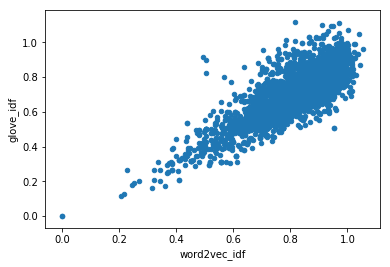

In [71]:
%matplotlib inline
df.plot(x='word2vec_idf', y='glove_idf', kind='scatter')

In [72]:
# load Elmo scores that were calculated in ScoreELMO.ipynb
elmo = pd.read_csv('elmo_results.csv')

# Add Human Rater information

In [73]:
raters= pd.read_csv('./Measurement study/Response level Data/all_rater_originality.csv')
combined = pd.merge(df, raters)
# Bind between 0 and 1, with 0 being less original.
combined['vote_norm'] = combined.human_vote/4
combined.to_csv('Measurement study/Response level Data/algo_scores_combined.csv', index=False)

In [74]:
combined.sample(2)

,prompt,response,cu_lsa,glove_idf,word2vec_idf,tasa_lsa,en100_lsa,glove,tasa_lsa_idf,en100_lsa_idf,word2vec,elmo,elmo_idf,Danielle,Mandy,Megan,Mike,human_vote,vote_norm
1396,fork,annoying the cat,0.08,0.852634,0.904801,0.938058,0.677116,0.831678,0.919007,0.660754,0.913081,0.314472,0.320828,2.0,3.0,3.0,3.0,2.75,0.6875
3366,tire,for weight,0.24,0.615857,0.810525,0.928583,0.431493,0.724153,0.907027,0.431493,0.864191,0.356466,0.377837,1.0,1.0,2.0,2.0,1.50,0.3750


Combine the scores with the original participant level data.

In [75]:
participants = pd.read_csv('Measurement study/Participant level data/AlternateUses-cleaned.csv')
by_participant = pd.merge(participants, combined).sort_values(['participant','prompt', 'response_num'])
by_participant.to_csv('Measurement study/Participant level data/scored-participants.csv')

In [76]:
by_participant.head(2)

,participant,prompt,response_num,original_response,response,cu_lsa,glove_idf,word2vec_idf,tasa_lsa,en100_lsa,...,en100_lsa_idf,word2vec,elmo,elmo_idf,Danielle,Mandy,Megan,Mike,human_vote,vote_norm
0,1,book,0,read,read,0.50,0.344389,0.610635,0.727653,0.246462,...,0.246462,0.610635,0.392895,0.392895,0.0,0.0,0.0,1.0,0.25,0.0625
15,1,book,1,paper weight,paperweight,0.05,0.939968,0.837175,0.998924,0.774843,...,0.774843,0.837175,0.428375,0.428375,2.0,1.0,2.0,2.0,1.75,0.4375


In [93]:
by_participant['composite'] = by_participant[['glove_idf', 'word2vec_idf', 'tasa_lsa_idf', 'en100_lsa_idf']].apply(np.mean, axis=1)

In [94]:
test = by_participant.groupby(['participant']).mean()
test.corr()

,response_num,cu_lsa,glove_idf,word2vec_idf,tasa_lsa,en100_lsa,glove,tasa_lsa_idf,en100_lsa_idf,word2vec,elmo,elmo_idf,Danielle,Mandy,Megan,Mike,human_vote,vote_norm,composite
response_num,1.000000,-0.235722,0.210257,0.190653,0.194528,0.022491,0.171075,0.232572,0.098218,0.075204,0.041935,-0.027136,0.137745,0.171897,0.192717,0.208258,0.178073,0.178073,0.190771
cu_lsa,-0.235722,1.000000,-0.761858,-0.473450,-0.570909,-0.262923,-0.617585,-0.767611,-0.659675,-0.114259,-0.357340,-0.225029,-0.584208,-0.580887,-0.541100,-0.609975,-0.585196,-0.585196,-0.728611
glove_idf,0.210257,-0.761858,1.000000,0.800354,0.848916,0.684448,0.935506,0.943419,0.884666,0.567558,0.012314,-0.024592,0.734108,0.759810,0.710551,0.765508,0.750593,0.750593,0.971708
word2vec_idf,0.190653,-0.473450,0.800354,1.000000,0.838267,0.787360,0.817783,0.825274,0.858640,0.870127,-0.461795,-0.486004,0.483224,0.496022,0.492491,0.497929,0.496702,0.496702,0.895019
tasa_lsa,0.194528,-0.570909,0.848916,0.838267,1.000000,0.814527,0.938101,0.900787,0.831633,0.787643,-0.265184,-0.230210,0.604134,0.616534,0.624109,0.624417,0.622604,0.622604,0.893563
en100_lsa,0.022491,-0.262923,0.684448,0.787360,0.814527,1.000000,0.786901,0.692973,0.825254,0.860720,-0.479484,-0.377863,0.474129,0.496327,0.477761,0.459389,0.482426,0.482426,0.765697
glove,0.171075,-0.617585,0.935506,0.817783,0.938101,0.786901,1.000000,0.888879,0.872872,0.713433,-0.169829,-0.159754,0.650348,0.677453,0.651290,0.680828,0.672054,0.672054,0.931912
tasa_lsa_idf,0.232572,-0.767611,0.943419,0.825274,0.900787,0.692973,0.888879,1.000000,0.868326,0.604674,-0.018885,-0.043647,0.733263,0.751488,0.727998,0.759172,0.750043,0.750043,0.964205
en100_lsa_idf,0.098218,-0.659675,0.884666,0.858640,0.831633,0.825254,0.872872,0.868326,1.000000,0.694293,-0.205340,-0.222029,0.589244,0.600708,0.575073,0.600157,0.598264,0.598264,0.945346
word2vec,0.075204,-0.114259,0.567558,0.870127,0.787643,0.860720,0.713433,0.604674,0.694293,1.000000,-0.703300,-0.622942,0.292046,0.311491,0.327391,0.284952,0.306569,0.306569,0.684175


### Write in Denis' Preferred way

In [ ]:
print("Ignoring these columns:", by_participant.columns[:5].tolist())
for col in by_participant.columns[5:].tolist():
    b = pd.pivot_table(by_participant, values=col, index='participant', columns='prompt', aggfunc=np.mean)
    b.to_csv('Measurement study/Participant level data/by-system-pivot/scores-%s.csv' % col)

In [78]:
print("Ignoring these columns:", by_participant.columns[:5].tolist())
for col in by_participant.columns[5:].tolist():
    b = pd.pivot_table(by_participant, values=col, index='participant', columns='prompt', aggfunc=np.mean)
    b.to_csv('Measurement study/Participant level data/by-system-pivot/scores-%s.csv' % col)

Ignoring these columns: ['participant', 'prompt', 'response_num', 'original_response', 'response']


In [80]:
print(col)
b.head(2)

vote_norm


prompt,book,bottle,brick,fork,pants,rope,shoe,shovel,table,tire
participant,,,,,,,,,,
1,0.412500,0.500000,0.500000,0.5000,0.4875,0.508929,0.645833,0.546875,0.520833,0.468750
2,0.364583,0.506944,0.340278,0.4625,0.3125,0.307692,0.406250,0.385417,0.409722,0.326389


In [81]:
b = pd.pivot_table(by_participant, values='glove_idf', index='participant', columns='prompt', aggfunc=np.mean)

In [22]:
a[list(params.keys())+['cu_lsa', 'elmo_idf', 'elmo']].corr()

NameError: name 'a' is not defined

## Compare Ranks

In [17]:
rank_diff = (df['glove_rank'] - df['cu_lsa_rank'])
low, high = rank_diff.quantile(0.05),rank_diff.quantile(0.95)
low, high

(-174.225, 164.44999999999982)

In [18]:
print("LSA thinks the response is notably more original than Glove".upper())
groups = df[rank_diff >= high].groupby('prompt')
for prompt, group in groups:
    print(prompt.center(100, '='))
    print(", ".join(list(group.response)))

print("\nGlove thinks the response is notably more original than LSA".upper())
groups = df[rank_diff <= low].groupby('prompt')
for prompt, group in groups:
    print(prompt.center(100, '='))
    print(";  ".join(list(group.response)))

LSA THINKS THE RESPONSE IS NOTABLY MORE ORIGINAL THAN GLOVE
================================================book================================================
audio, computer stand, for weight, fuel for a fire, ruler, borrow, wrapping paper, fuel for fire, levelling furniture, kill cockroaches and spider, fuel, selling, cutting drawings, digger, level, rain cover, drawing, tray, to fuel a fire, drum, kill bugs, headrest, coloring, hiding money, a level, procedure, boredom, decoration, hammer, filter, cat toys, drink coaster, divider, sculpture, umbrella, projectile, shelfs, christmas tree, food masher, kindling, defensive weapon, food, balance helper, biography of a person, weight, massage equipment, weighing, air conditioning, wall, weapon, firewood, workout equipment, firestarter, house, a weapon, protection
===============================================bottle===============================================
vase for flowers, dog toy, store items in fridge, piggy bank, han, recycle,

In [19]:
df.sample(3)

,prompt,response,cu_lsa,glove,glove_stop,glove_idf,glove_rank,cu_lsa_rank
1190,brick,step stool,0.12,0.009238,0.009238,0.013177,178.0,117.0
81,book,store data,0.03,-0.048602,-0.048602,-0.049971,24.0,24.5
2226,rope,make a rope swing,0.79,0.336707,0.674124,0.658343,485.5,486.0


# Correlations between glove and cu_lsa

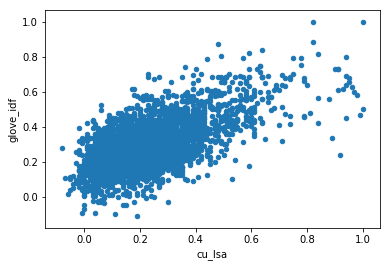

In [69]:
df.plot(kind='scatter', x='cu_lsa', y='glove_idf')

In [21]:
for prompt in df.prompt.unique():
    print(prompt.upper())
    sort = df[df.prompt == prompt].sort_values('glove_stop')
    print("Worst responses", " | ".join(sort.head(10).astype(str).response.tolist()))
    print("Best responses", " | ".join(sort.tail(10).astype(str).response.tolist()))
    print()

BOOK
Worst responses file folder | notebook | conversation opener | for competitions | entertainment | photocopy it | papier mache | club | stool | a stool
Best responses papercrafting | doorstopper | footrest | leveler | bookend | stac | kidnling | origam | donat | smush something

BOTTLE
Worst responses put a m | build with | build in | for seeds | for planting | megaphone | wall | pl | fairy garden | in ground as a garden decoration
Best responses put a candle in the top of a glass bottle | water bottle | baby bottle | beer bottle | noisemaker | see the | windchimes | spitoon | for keep | recylce

BRICK
Worst responses pencil holder | door opener | paper holder | shoes | abrasive | toys | downspout diverter | hide behind | hide a geocache | door holder
Best responses doorstopper | candleholders | dumbb | used | for decroation | mortaring | bookend | as a doorstopper | exfoliator | leveler

FORK
Worst responses get something which fell | open the can with | scratcher | back scratcher

## Add Rater Information

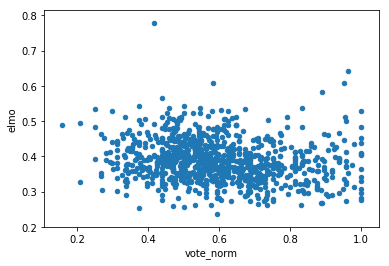

In [48]:
a.plot(y='elmo', x='vote_norm', kind='scatter')

*Important: Remember to do correlation only on responses that have an LSA score*

In [52]:
combined[~combined.cu_lsa.isnull()][list(params.keys())+['cu_lsa', 'vote_norm', 'elmo', 'elmo_idf']].corr(method='pearson').sort_values('vote_norm')

,glove_idf,word2vec_idf,tasa_lsa,en100_lsa,cu_lsa,vote_norm,elmo,elmo_idf
elmo_idf,0.544379,0.706456,0.484262,0.514684,0.393896,-0.023284,0.949469,1.000000
elmo,0.506221,0.659141,0.492509,0.560561,0.355562,-0.013302,1.000000,0.949469
en100_lsa,0.725426,0.638531,0.581374,1.000000,0.534017,0.254461,0.560561,0.514684
cu_lsa,0.646100,0.600219,0.796548,0.534017,1.000000,0.288404,0.355562,0.393896
word2vec_idf,0.815522,1.000000,0.662559,0.638531,0.600219,0.308808,0.659141,0.706456
tasa_lsa,0.658620,0.662559,1.000000,0.581374,0.796548,0.318601,0.492509,0.484262
glove_idf,1.000000,0.815522,0.658620,0.725426,0.646100,0.396876,0.506221,0.544379
vote_norm,0.396876,0.308808,0.318601,0.254461,0.288404,1.000000,-0.013302,-0.023284
